In [12]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import open_clip
from tqdm import tqdm

def save_encoded_mnist(mnist_path, device, clip_model, clip_pretrained, save_path, batch_size, resize_length):

    # Load the MNIST dataset
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((resize_length, resize_length)),  # Resize to match CLIP's expected input size
        # transforms.Normalize((0.5,), (0.5,))
    ])

    train_dataset = torchvision.datasets.MNIST(root=mnist_path, train=True, download=False, transform=transform)
    test_dataset = torchvision.datasets.MNIST(root=mnist_path, train=False, download=False, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Load the CLIP model
    model, _, preprocess = open_clip.create_model_and_transforms(
        clip_model,
        pretrained=clip_pretrained,
        cache_dir=os.path.join(mnist_path),
        device=device,
    )

    def batch_preprocess(image_batch, preprocess):
        to_pil_image = transforms.ToPILImage()
        image_stack = torch.concat([preprocess(to_pil_image(img)).unsqueeze(0) for img in image_batch])
        return image_stack

    def encode_dataset(data_loader):
        encoded_vectors = []
        targets = []
        images_batchs = []

        model.eval()
        with torch.no_grad():
            for images, labels in tqdm(data_loader):
                images_preprocessed = batch_preprocess(images, preprocess)
                images_preprocessed = images_preprocessed.to(device)
                features = model.encode_image(images_preprocessed)
                encoded_vectors.append(features.cpu())
                images_batchs.append(images.cpu())
                targets.append(labels)

        encoded_vectors = torch.cat(encoded_vectors)
        images_batchs = torch.cat(images_batchs)
        targets = torch.cat(targets)

        return encoded_vectors, targets, images_batchs

    # Encode the MNIST training and test datasets
    print("Begin Encoding MNIST training datasets saved.")
    train_encoded_vectors, train_targets, train_images_batchs = encode_dataset(train_loader)
    print("Begin Encoding MNIST testing datasets saved.")
    test_encoded_vectors, test_targets, test_images_batchs = encode_dataset(test_loader)

    # Save the encoded vectors and targets
    torch.save((train_images_batchs, train_encoded_vectors, train_targets),
               f'{save_path}/encoded_mnist/encoded_mnist_train_{clip_model}_{clip_pretrained}_{resize_length}.pth')
    torch.save((test_images_batchs, test_encoded_vectors, test_targets),
               f'{save_path}/encoded_mnist/encoded_mnist_test_{clip_model}_{clip_pretrained}_{resize_length}.pth')

    print("Encoded MNIST datasets saved.")
    
import os
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets
import open_clip
from tqdm import tqdm

def save_encoded_usps(usps_path, device, clip_model, clip_pretrained, save_path, batch_size, resize_length):

    # Load the USPS dataset
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((resize_length, resize_length)),  # Resize to match CLIP's expected input size
        # transforms.Normalize((0.5,), (0.5,))
    ])

    train_dataset = datasets.USPS(root=usps_path, train=True, download=True, transform=transform)
    test_dataset = datasets.USPS(root=usps_path, train=False, download=True, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Load the CLIP model
    model, _, preprocess = open_clip.create_model_and_transforms(
        clip_model,
        pretrained=clip_pretrained,
        cache_dir=os.path.join(usps_path),
        device=device,
    )

    def batch_preprocess(image_batch, preprocess):
        to_pil_image = transforms.ToPILImage()
        image_stack = torch.concat([preprocess(to_pil_image(img)).unsqueeze(0) for img in image_batch])
        return image_stack

    def encode_dataset(data_loader):
        encoded_vectors = []
        targets = []
        images_batches = []

        model.eval()
        with torch.no_grad():
            for images, labels in tqdm(data_loader):
                images_preprocessed = batch_preprocess(images, preprocess)
                images_preprocessed = images_preprocessed.to(device)
                features = model.encode_image(images_preprocessed)
                encoded_vectors.append(features.cpu())
                images_batches.append(images.cpu())
                targets.append(labels)

        encoded_vectors = torch.cat(encoded_vectors)
        images_batches = torch.cat(images_batches)
        targets = torch.cat(targets)

        return encoded_vectors, targets, images_batches

    # Encode the USPS training and test datasets
    print("Begin Encoding USPS training datasets saved.")
    train_encoded_vectors, train_targets, train_images_batches = encode_dataset(train_loader)
    print("Begin Encoding USPS testing datasets saved.")
    test_encoded_vectors, test_targets, test_images_batches = encode_dataset(test_loader)

    # Save the encoded vectors and targets
    torch.save((train_images_batches, train_encoded_vectors, train_targets),
               f'{save_path}/encoded_usps/encoded_usps_train_{clip_model}_{clip_pretrained}_{resize_length}.pth')
    torch.save((test_images_batches, test_encoded_vectors, test_targets),
               f'{save_path}/encoded_usps/encoded_usps_test_{clip_model}_{clip_pretrained}_{resize_length}.pth')

    print("Encoded USPS datasets saved.")

# Example usage:
# save_encoded_usps('path_to_usps_data', 'cuda', 'ViT-B-32', 'openai', 'path_to_save_encoded_data', 64)

In [13]:
import os

mnist_path = '../data'
device = 'cuda:3' if torch.cuda.is_available() else 'cpu'
clip_model = 'ViT-L-14'
clip_pretrained = 'commonpool_xl_s13b_b90k'
save_path = '../data'
batch_size = 512
resize_length = 28

os.makedirs(save_path, exist_ok=True)

# save_encoded_mnist(mnist_path, device, clip_model, clip_pretrained, save_path, batch_size, resize_length)
save_encoded_usps(mnist_path, device, clip_model, clip_pretrained, save_path, batch_size, resize_length)


Begin Encoding USPS training datasets saved.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [01:44<00:00,  6.96s/it]


Begin Encoding USPS testing datasets saved.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:29<00:00,  7.30s/it]

Encoded USPS datasets saved.


In [15]:
import torch
import os

encoded_vectors, targets, images_batch = torch.load(os.path.join('../data', 'encoded_usps/encoded_usps_test_ViT-L-14_commonpool_xl_s13b_b90k_28.pth'))

print(encoded_vectors.shape, targets.shape, images_batch.shape)
# check the data type
print(type(encoded_vectors), type(targets), type(images_batch))
# check the dtype
print(encoded_vectors.dtype, targets.dtype, images_batch.dtype)
# give the range of encoded vectors
print(encoded_vectors.min(), encoded_vectors.max())

encoded_vectors, targets, images_batch = torch.load(os.path.join('../data', 'encoded_mnist/encoded_mnist_test_ViT-L-14_commonpool_xl_s13b_b90k_28.pth'))

print(encoded_vectors.shape, targets.shape, images_batch.shape)
# check the data type
print(type(encoded_vectors), type(targets), type(images_batch))
# check the dtype
print(encoded_vectors.dtype, targets.dtype, images_batch.dtype)
# give the range of encoded vectors
print(encoded_vectors.min(), encoded_vectors.max())

torch.Size([2007, 1, 28, 28]) torch.Size([2007, 768]) torch.Size([2007])
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
torch.float32 torch.float32 torch.int64
tensor(0.) tensor(0.9985)
torch.Size([10000, 1, 28, 28]) torch.Size([10000, 768]) torch.Size([10000])
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
torch.float32 torch.float32 torch.int64
tensor(0.) tensor(1.)


In [25]:
# A = torch.randn(size=encoded_vectors.shape[1:])
encoded_vectors.shape[1:][0]

1

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import open_clip
from tqdm import tqdm

def save_encoded_svhn(svhn_path, device, clip_model, clip_pretrained, save_path, batch_size):

    # Load the SVHN dataset
    transform = transforms.Compose([
        transforms.ToTensor(),
    ])

    train_dataset = torchvision.datasets.SVHN(root=svhn_path, split='train', download=True, transform=transform)
    test_dataset = torchvision.datasets.SVHN(root=svhn_path, split='test', download=True, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Load the CLIP model
    model, _, preprocess = open_clip.create_model_and_transforms(
        clip_model,
        pretrained=clip_pretrained,
        cache_dir=os.path.join(svhn_path),
        device=device,
    )

    def batch_preprocess(image_batch, preprocess):
        to_pil_image = transforms.ToPILImage()
        image_stack = torch.concat([preprocess(to_pil_image(img)).unsqueeze(0) for img in image_batch])
        return image_stack

    def encode_dataset(data_loader):
        encoded_vectors = []
        targets = []
        images_batchs = []

        model.eval()
        with torch.no_grad():
            for images, labels in tqdm(data_loader):
                images_preprocessed = batch_preprocess(images, preprocess)
                images_preprocessed = images_preprocessed.to(device)
                features = model.encode_image(images_preprocessed)
                encoded_vectors.append(features.cpu())
                images_batchs.append(images.cpu())
                targets.append(labels)

        encoded_vectors = torch.cat(encoded_vectors)
        images_batchs = torch.cat(images_batchs)
        targets = torch.cat(targets)

        return encoded_vectors, targets, images_batchs

    # Encode the SVHN training and test datasets
    print("Begin Encoding SVHN training datasets saved.")
    train_encoded_vectors, train_targets, train_images_batchs = encode_dataset(train_loader)
    print("Begin Encoding SVHN testing datasets saved.")
    test_encoded_vectors, test_targets, test_images_batchs = encode_dataset(test_loader)
    
    os.makedirs(os.path.join(save_path, 'encoded_svhn'), exist_ok=True)

    # Save the encoded vectors and targets
    torch.save((train_images_batchs, train_encoded_vectors, train_targets),
               f'{save_path}/encoded_svhn/encoded_svhn_train_{clip_model}_{clip_pretrained}_32.pth')
    torch.save((test_images_batchs, test_encoded_vectors, test_targets),
               f'{save_path}/encoded_svhn/encoded_svhn_test_{clip_model}_{clip_pretrained}_32.pth')

    print("Encoded SVHN datasets saved.")

In [17]:
import torch
import os

svhn_path = '../data'
device = 'cuda:3' if torch.cuda.is_available() else 'cpu'
clip_model = 'ViT-L-14'
clip_pretrained = 'commonpool_xl_clip_s13b_b90k'
save_path = '../data'
batch_size = 512

print(os.path.abspath(os.path.join(save_path, 'encoded_svhn')))
# os.makedirs(save_path, exist_ok=True)
save_encoded_svhn(svhn_path, device, clip_model, clip_pretrained, save_path, batch_size)

/local/scratch/a/gong123/vaub-gp-pl-hydra/data/encoded_svhn
Using downloaded and verified file: ../data/train_32x32.mat
Using downloaded and verified file: ../data/test_32x32.mat
Begin Encoding SVHN training datasets saved.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 144/144 [19:08<00:00,  7.98s/it]


Begin Encoding SVHN testing datasets saved.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 51/51 [06:42<00:00,  7.89s/it]


Encoded SVHN datasets saved.


In [2]:
import torch
import os

svhn_path = '../data'
device = 'cuda:3' if torch.cuda.is_available() else 'cpu'
clip_model = 'EVA02-E-14-plus'
clip_pretrained = 'laion2b_s9b_b144k'
save_path = '../data'
batch_size = 32

print(os.path.abspath(os.path.join(save_path, 'encoded_svhn')))
save_encoded_svhn(svhn_path, device, clip_model, clip_pretrained, save_path, batch_size)

/local/scratch/a/gong123/vaub-gp-pl-hydra/data/encoded_svhn
Using downloaded and verified file: ../data/train_32x32.mat
Using downloaded and verified file: ../data/test_32x32.mat
Begin Encoding SVHN training datasets saved.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 2290/2290 [3:34:59<00:00,  5.63s/it]


Begin Encoding SVHN testing datasets saved.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 814/814 [1:15:47<00:00,  5.59s/it]


Encoded SVHN datasets saved.


In [20]:
encoded_vectors, targets, images_batch = torch.load(os.path.join('../data', 'encoded_svhn/encoded_svhn_test_ViT-L-14_commonpool_xl_clip_s13b_b90k_32.pth'))

print(encoded_vectors.shape, targets.shape, images_batch.shape)
# check the data type
print(type(encoded_vectors), type(targets), type(images_batch))
# check the dtype
print(encoded_vectors.dtype, targets.dtype, images_batch.dtype)
# give the range of encoded vectors
print(encoded_vectors.min(), encoded_vectors.max())

torch.Size([26032, 3, 32, 32]) torch.Size([26032, 768]) torch.Size([26032])
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
torch.float32 torch.float32 torch.int64
tensor(0.) tensor(1.)


In [3]:
encoded_vectors, targets, images_batch = torch.load(os.path.join('../data', 'encoded_svhn/encoded_svhn_test_EVA02-E-14-plus_laion2b_s9b_b144k_32.pth'))

print(encoded_vectors.shape, targets.shape, images_batch.shape)
# check the data type
print(type(encoded_vectors), type(targets), type(images_batch))
# check the dtype
print(encoded_vectors.dtype, targets.dtype, images_batch.dtype)
# give the range of encoded vectors
print(encoded_vectors.min(), encoded_vectors.max())

torch.Size([26032, 3, 32, 32]) torch.Size([26032, 1024]) torch.Size([26032])
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
torch.float32 torch.float32 torch.int64
tensor(0.) tensor(1.)


In [9]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import open_clip
from tqdm import tqdm

def save_encoded_rotated_mnist(mnist_path, device, clip_model, clip_pretrained, save_path, batch_size, resize_length, rotation_angle):

    # Load the MNIST dataset
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Resize((resize_length, resize_length)),  # Resize to match CLIP's expected input size
        transforms.RandomRotation((rotation_angle, rotation_angle)),
        # transforms.Normalize((0.5,), (0.5,))
    ])

    train_dataset = torchvision.datasets.MNIST(root=mnist_path, train=True, download=False, transform=transform)
    test_dataset = torchvision.datasets.MNIST(root=mnist_path, train=False, download=False, transform=transform)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    # Load the CLIP model
    model, _, preprocess = open_clip.create_model_and_transforms(
        clip_model,
        pretrained=clip_pretrained,
        cache_dir=os.path.join(mnist_path),
        device=device,
    )

    def batch_preprocess(image_batch, preprocess):
        to_pil_image = transforms.ToPILImage()
        image_stack = torch.concat([preprocess(to_pil_image(img)).unsqueeze(0) for img in image_batch])
        return image_stack

    def encode_dataset(data_loader):
        encoded_vectors = []
        targets = []
        images_batchs = []

        model.eval()
        with torch.no_grad():
            for images, labels in tqdm(data_loader):
                images_preprocessed = batch_preprocess(images, preprocess)
                images_preprocessed = images_preprocessed.to(device)
                features = model.encode_image(images_preprocessed)
                encoded_vectors.append(features.cpu())
                images_batchs.append(images.cpu())
                targets.append(labels)

        encoded_vectors = torch.cat(encoded_vectors)
        images_batchs = torch.cat(images_batchs)
        targets = torch.cat(targets)

        return encoded_vectors, targets, images_batchs

    # Encode the MNIST training and test datasets
    print("Begin Encoding Rotated MNIST training datasets saved.")
    train_encoded_vectors, train_targets, train_images_batchs = encode_dataset(train_loader)
    print("Begin Encoding Rotated MNIST testing datasets saved.")
    test_encoded_vectors, test_targets, test_images_batchs = encode_dataset(test_loader)

    # Save the encoded vectors and targets
    torch.save((train_images_batchs, train_encoded_vectors, train_targets),
               f'{save_path}/encoded_mnist/encoded_mnist_train_{clip_model}_{clip_pretrained}_{resize_length}_rot_{rotation_angle}.pth')
    torch.save((test_images_batchs, test_encoded_vectors, test_targets),
               f'{save_path}/encoded_mnist/encoded_mnist_test_{clip_model}_{clip_pretrained}_{resize_length}_rot_{rotation_angle}.pth')

    print("Encoded Rotated MNIST datasets saved.")

In [10]:
import os

mnist_path = '../data'
device = 'cuda:3' if torch.cuda.is_available() else 'cpu'
clip_model = 'ViT-L-14'
clip_pretrained = 'commonpool_xl_s13b_b90k'
save_path = '../data'
batch_size = 512
resize_length = 28
rotation_angle = 90

os.makedirs(save_path, exist_ok=True)

save_encoded_rotated_mnist(mnist_path, device, clip_model, clip_pretrained, save_path, batch_size, resize_length, rotation_angle)

Begin Encoding Rotated MNIST training datasets saved.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [14:52<00:00,  7.57s/it]


Begin Encoding Rotated MNIST testing datasets saved.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [02:29<00:00,  7.46s/it]


Encoded Rotated MNIST datasets saved.


torch.Size([10000, 768]) torch.Size([10000]) torch.Size([10000, 1, 28, 28])
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
torch.float32 torch.int64 torch.float32


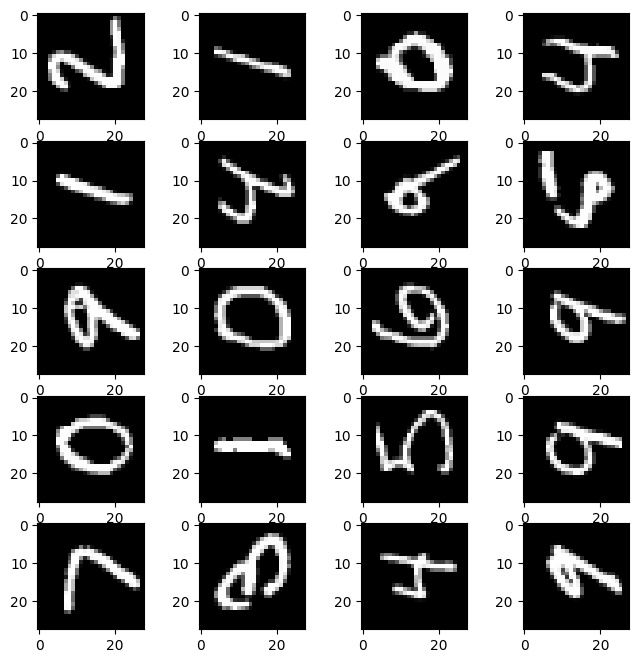

In [15]:
images_batch, encoded_vectors, targets = torch.load(os.path.join('../data', 'encoded_mnist/encoded_mnist_test_ViT-L-14_commonpool_xl_s13b_b90k_28_rot_90.pth'))

print(encoded_vectors.shape, targets.shape, images_batch.shape)
# check the data type
print(type(encoded_vectors), type(targets), type(images_batch))
# check the dtype
print(encoded_vectors.dtype, targets.dtype, images_batch.dtype)

import matplotlib.pyplot as plt
# visulize the images
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = images_batch[i].squeeze()
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')


In [16]:
import os

mnist_path = '../data'
device = 'cuda:3' if torch.cuda.is_available() else 'cpu'
clip_model = 'ViT-L-14'
clip_pretrained = 'commonpool_xl_s13b_b90k'
save_path = '../data'
batch_size = 512
resize_length = 28
rotation_angle = 45

os.makedirs(save_path, exist_ok=True)

save_encoded_rotated_mnist(mnist_path, device, clip_model, clip_pretrained, save_path, batch_size, resize_length, rotation_angle)

Begin Encoding Rotated MNIST training datasets saved.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118/118 [14:53<00:00,  7.57s/it]


Begin Encoding Rotated MNIST testing datasets saved.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [02:29<00:00,  7.47s/it]


Encoded Rotated MNIST datasets saved.


torch.Size([10000, 768]) torch.Size([10000]) torch.Size([10000, 1, 28, 28])
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
torch.float32 torch.int64 torch.float32


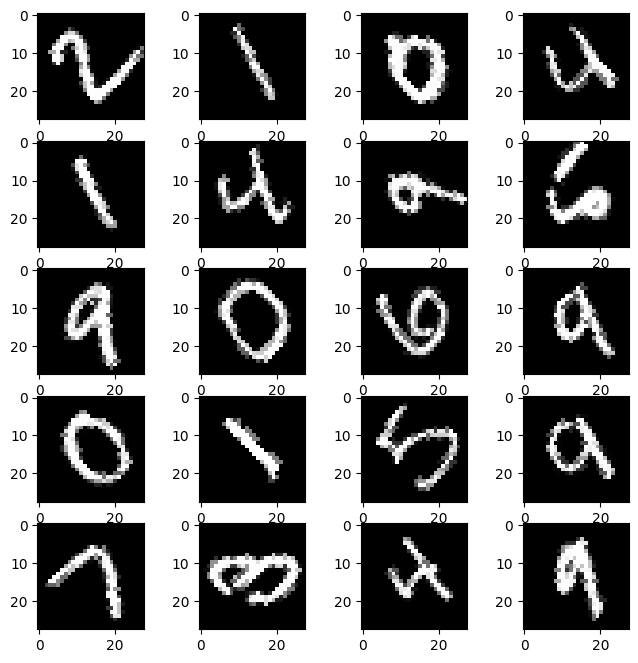

In [17]:
images_batch, encoded_vectors, targets = torch.load(os.path.join('../data', 'encoded_mnist/encoded_mnist_test_ViT-L-14_commonpool_xl_s13b_b90k_28_rot_45.pth'))

print(encoded_vectors.shape, targets.shape, images_batch.shape)
# check the data type
print(type(encoded_vectors), type(targets), type(images_batch))
# check the dtype
print(encoded_vectors.dtype, targets.dtype, images_batch.dtype)

import matplotlib.pyplot as plt
# visulize the images
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = images_batch[i].squeeze()
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')


In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset, random_split
import open_clip
from tqdm import tqdm

def save_encoded_celeba(celeba_path, device, clip_model, clip_pretrained, save_path, batch_size, resize_length):

    transform = transforms.Compose([
        transforms.CenterCrop(178),  # Center crop to square (178x178)
        transforms.Resize((resize_length, resize_length)), # Resize to 32x32
        transforms.ToTensor()        # Convert to tensor
    ])
    
    # Load CelebA dataset with attributes
    celeba_dataset = torchvision.datasets.CelebA(root=celeba_path, split='all', target_type='attr', transform=transform, download=True)
    
    # The index of the 'Male' attribute in the CelebA attribute file
    male_idx = celeba_dataset.attr_names.index('Male')
        
    # Get indices for male and female images
    male_indices = [i for i, attr in enumerate(celeba_dataset.attr) if attr[male_idx] == 1]
    female_indices = [i for i, attr in enumerate(celeba_dataset.attr) if attr[male_idx] == 0]
    
    # Create subsets for male and female datasets
    male_dataset = Subset(celeba_dataset, male_indices)
    female_dataset = Subset(celeba_dataset, female_indices)
    
    # Do random split for datasets to create train and test datasets
    train_male_dataset, test_male_dataset = random_split(male_dataset, [0.8, 0.2])
    train_female_dataset, test_female_dataset = random_split(female_dataset, [0.8, 0.2])
        
    # Create DataLoaders for the male and female datasets
    train_male_dataloader = DataLoader(train_male_dataset, batch_size=batch_size, shuffle=True, num_workers=16, drop_last=True)
    test_male_dataloader = DataLoader(test_male_dataset, batch_size=batch_size, shuffle=True, num_workers=16, drop_last=True)
    train_female_dataloader = DataLoader(train_female_dataset, batch_size=batch_size, shuffle=True, num_workers=16, drop_last=True)
    test_female_dataloader = DataLoader(test_female_dataset, batch_size=batch_size, shuffle=True, num_workers=16, drop_last=True)
    
    # Load the CLIP model
    model, _, preprocess = open_clip.create_model_and_transforms(
        clip_model,
        pretrained=clip_pretrained,
        cache_dir=os.path.join(celeba_path),
        device=device,
    )

    def batch_preprocess(image_batch, preprocess):
        to_pil_image = transforms.ToPILImage()
        image_stack = torch.concat([preprocess(to_pil_image(img)).unsqueeze(0) for img in image_batch])
        return image_stack

    def encode_dataset(data_loader):
        encoded_vectors = []
        targets = []
        images_batchs = []

        model.eval()
        with torch.no_grad():
            for images, labels in tqdm(data_loader):
                images_preprocessed = batch_preprocess(images, preprocess)
                images_preprocessed = images_preprocessed.to(device)
                features = model.encode_image(images_preprocessed)
                encoded_vectors.append(features.cpu())
                images_batchs.append(images.cpu())
                targets.append(labels)
                # break

        encoded_vectors = torch.cat(encoded_vectors)
        images_batchs = torch.cat(images_batchs)
        targets = torch.cat(targets)

        return encoded_vectors, targets, images_batchs

    # Encode the CelebA training and test datasets
    print("Begin Encoding CelebA male training datasets saved.")
    train_male_encoded_vectors, train_male_targets, train_male_batches = encode_dataset(train_male_dataloader)
    print("Begin Encoding CelebA male testing datasets saved.")
    test_male_encoded_vectors, test_male_targets, test_male_batches = encode_dataset(test_male_dataloader)
    
    print("Begin Encoding CelebA female training datasets saved.")
    train_female_encoded_vectors, train_female_targets, train_female_batches = encode_dataset(train_female_dataloader)
    print("Begin Encoding CelebA female testing datasets saved.")
    test_female_encoded_vectors, test_female_targets, test_female_batches = encode_dataset(test_female_dataloader)

    os.makedirs(os.path.join(save_path, 'encoded_celebA'), exist_ok=True)
    
    # Save the encoded vectors and targets
    torch.save((train_male_batches, train_male_encoded_vectors, train_male_targets),
               f'{save_path}/encoded_celebA/encoded_celebA_train_male_{clip_model}_{clip_pretrained}_{resize_length}.pth')
    torch.save((test_male_batches, test_male_encoded_vectors, test_male_targets),
               f'{save_path}/encoded_celebA/encoded_celebA_test_male_{clip_model}_{clip_pretrained}_{resize_length}.pth')
    torch.save((train_female_batches, train_female_encoded_vectors, train_female_targets),
               f'{save_path}/encoded_celebA/encoded_celebA_train_female_{clip_model}_{clip_pretrained}_{resize_length}.pth')
    torch.save((test_female_batches, test_female_encoded_vectors, test_female_targets),
               f'{save_path}/encoded_celebA/encoded_celebA_test_female_{clip_model}_{clip_pretrained}_{resize_length}.pth')

    print("Encoded CelebA datasets saved.")

In [5]:
import os

celeba_path = '../data'
device = 'cuda:3' if torch.cuda.is_available() else 'cpu'
clip_model = 'ViT-H-14-378-quickgelu'
clip_pretrained = 'dfn5b'
save_path = '../data'
batch_size = 128
resize_length = 32

os.makedirs(save_path, exist_ok=True)
save_encoded_celeba(celeba_path, device, clip_model, clip_pretrained, save_path, batch_size, resize_length)

Files already downloaded and verified
Begin Encoding CelebA male training datasets saved.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 263/263 [1:41:28<00:00, 23.15s/it]


Begin Encoding CelebA male testing datasets saved.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 65/65 [25:07<00:00, 23.19s/it]


Begin Encoding CelebA female training datasets saved.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 369/369 [2:22:16<00:00, 23.13s/it]


Begin Encoding CelebA female testing datasets saved.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 92/92 [35:30<00:00, 23.16s/it]


Encoded CelebA datasets saved.


torch.Size([23552, 1024]) torch.Size([23552, 40]) torch.Size([23552, 3, 32, 32])
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
torch.float32 torch.int64 torch.float32


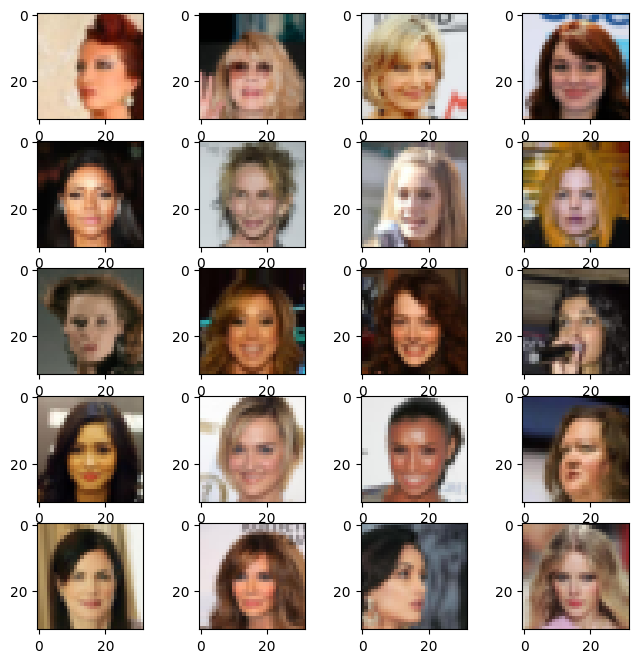

In [6]:
import os

images_batch, encoded_vectors, targets = torch.load(os.path.join('../data', 'encoded_celebA/encoded_celebA_test_female_ViT-H-14-378-quickgelu_dfn5b_32.pth'))

print(encoded_vectors.shape, targets.shape, images_batch.shape)
# check the data type
print(type(encoded_vectors), type(targets), type(images_batch))
# check the dtype
print(encoded_vectors.dtype, targets.dtype, images_batch.dtype)

import matplotlib.pyplot as plt
# visulize the images
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = images_batch[i].squeeze()
    fig.add_subplot(rows, columns, i)
    plt.imshow(img.permute(1, 2, 0))

In [7]:
import os

celeba_path = '../data'
device = 'cuda:3' if torch.cuda.is_available() else 'cpu'
clip_model = 'ViT-H-14-378-quickgelu'
clip_pretrained = 'dfn5b'
save_path = '../data'
batch_size = 128
resize_length = 64

os.makedirs(save_path, exist_ok=True)
save_encoded_celeba(celeba_path, device, clip_model, clip_pretrained, save_path, batch_size, resize_length)

Files already downloaded and verified
Begin Encoding CelebA male training datasets saved.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 527/527 [1:42:04<00:00, 11.62s/it]


Begin Encoding CelebA male testing datasets saved.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 131/131 [25:20<00:00, 11.61s/it]


Begin Encoding CelebA female training datasets saved.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 738/738 [2:22:40<00:00, 11.60s/it]


Begin Encoding CelebA female testing datasets saved.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 184/184 [35:38<00:00, 11.62s/it]


Encoded CelebA datasets saved.


torch.Size([23552, 1024]) torch.Size([23552, 40]) torch.Size([23552, 3, 64, 64])
<class 'torch.Tensor'> <class 'torch.Tensor'> <class 'torch.Tensor'>
torch.float32 torch.int64 torch.float32


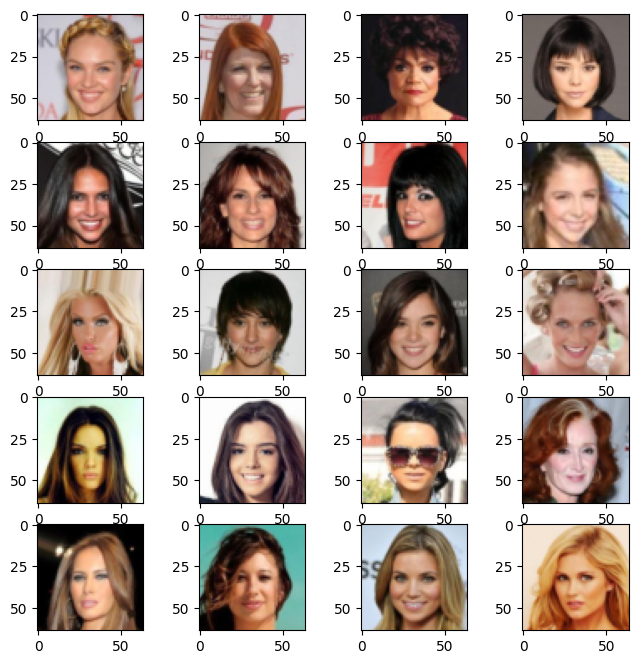

In [8]:
import os

images_batch, encoded_vectors, targets = torch.load(os.path.join('../data', 'encoded_celebA/encoded_celebA_test_female_ViT-H-14-378-quickgelu_dfn5b_64.pth'))

print(encoded_vectors.shape, targets.shape, images_batch.shape)
# check the data type
print(type(encoded_vectors), type(targets), type(images_batch))
# check the dtype
print(encoded_vectors.dtype, targets.dtype, images_batch.dtype)

import matplotlib.pyplot as plt
# visulize the images
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = images_batch[i].squeeze()
    fig.add_subplot(rows, columns, i)
    plt.imshow(img.permute(1, 2, 0))

In [9]:
import os

celeba_path = '../data'
device = 'cuda:3' if torch.cuda.is_available() else 'cpu'
clip_model = 'ViT-H-14-378-quickgelu'
clip_pretrained = 'dfn5b'
save_path = '../data'
batch_size = 128
resize_length = 128

os.makedirs(save_path, exist_ok=True)
save_encoded_celeba(celeba_path, device, clip_model, clip_pretrained, save_path, batch_size, resize_length)

Files already downloaded and verified
Begin Encoding CelebA male training datasets saved.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 527/527 [1:47:18<00:00, 12.22s/it]


Begin Encoding CelebA male testing datasets saved.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 131/131 [25:32<00:00, 11.70s/it]


Begin Encoding CelebA female training datasets saved.


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 738/738 [2:35:45<00:00, 12.66s/it]


Begin Encoding CelebA female testing datasets saved.


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 184/184 [35:54<00:00, 11.71s/it]


Encoded CelebA datasets saved.
